# TP - Non-parametric regression (Cubic splines)
<h4 align="right"> Author: Hicham Janati </h4>

The motorcycle dataset records the head's acceleration after an accident as a function of time. Download and visualize the data:

Students

Luiz Facury de Souza

Rafael Benatti

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/hichamjanati/hichamjanati.github.io/master/_data/Motorcycledata.txt"
names = ["x", "y"]
df_raw = pd.read_csv(url, index_col=0, delim_whitespace=True, names=names)
print(df_raw.shape)
df_raw.head()

(133, 2)


,x,y
1,2.4,0.0
2,2.6,-1.3
3,3.2,-2.7
4,3.6,0.0
5,4.0,-2.7


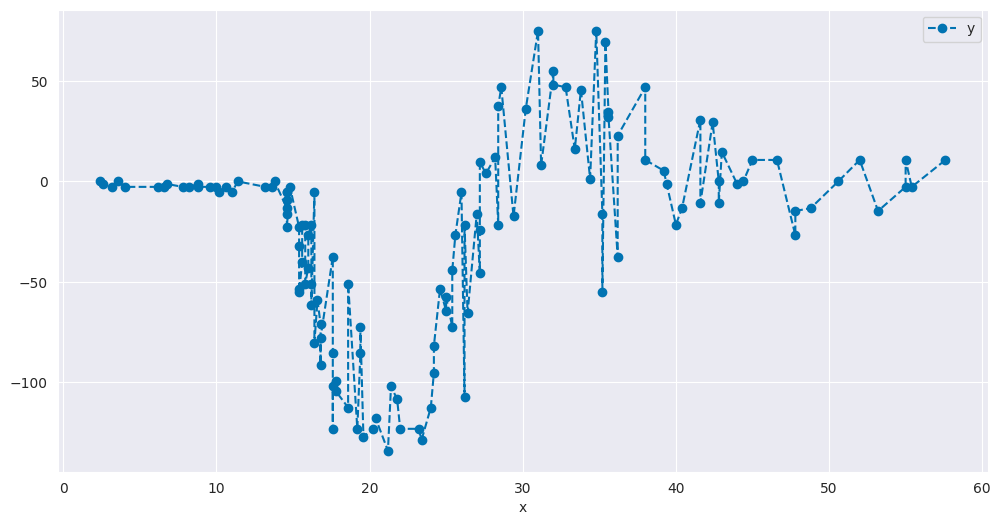

In [4]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("colorblind")
ax = df_raw.plot("x", "y", marker="o", ls="--", figsize=(12, 6))

In [5]:
X = df_raw["x"].values
y = df_raw["y"].values

#### Question 1
Transform the data to variables $(x, y, w)$ such that duplicated values are handled and ready to be fed to a weighted spline regression (cf TD Questions 5-6). 

**Answer:** 
To arrive to an equation of form 
$$ \min _g \sum_{i=1}^n w_i\left|y_i^{\prime}-g\left(x_i\right)\right|^2+\alpha \int_a^b g^{\prime \prime}(x)^2 \mathrm{~d} x $$

Equivalent to:
$$\min _g \sum_{i=1}^n \sum_{j=1}^m\left|y_{i j}-g\left(x_i\right)\right|^2+\alpha \int_a^b g^{\prime \prime}(x)^2 \mathrm{~d} x$$

$w_i$ must be the amount of observations of $y_i,...,y_m$ for a given $x_i$ while $y_i'$ is the average of the multiple response variable values 
$$y_i' = \frac{1}{m}\sum_{j=1}^m y_{i,j}$$


In [6]:
# The groupby function is used to get some information on a data based on its parameter.
grouped_mean = df_raw.groupby('x').mean()
# Since the groupby function uses its parameter as index we need to reset index
grouped_mean = grouped_mean.reset_index()
grouped_mean.columns = ['x', 'y_mean']

In [7]:
grouped_count = df_raw.groupby('x').count()
grouped_count = grouped_count.reset_index()
grouped_count.columns = ['x_count', 'y_count'] # I renamed x just to not have problems when joining columns

In [8]:
# Creating new datafram with y_prime and the weights
weights_df =  grouped_mean.copy()
weights_df = weights_df.join(grouped_count['y_count'])

### Polynomial regression
Polynomial regression (fitting a best polynomial on the data) can be done using `np.polyfit` to obtain the coefficients and `polyval` to evaluate it.

#### Question 2
Perform (weighted) polynomial regression on the data and visualize the fitted curves for degrees 1, 3, 10 on the same plot. Try higher degree polynomial fits. Besides overfitting, why is this potentially a bad idea ?

Higher degree polynomial fits is a bad ideia because it come with risks such as instability, and unreliable extrapolation. The instability problem means that small changes in the input data can lead to big changes in the model, which makes the model have an unpredictable behavior. The unreliable extrapolation problem is because higher degrees polynomial regression leads to, in general, bad predictions outside the range of our original input data. This can be shown in the two cells below.

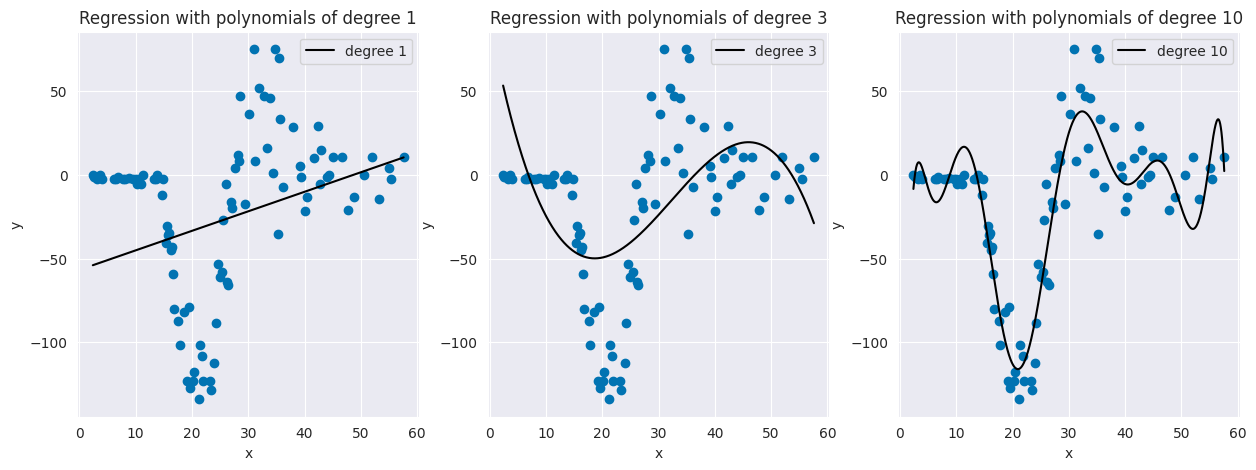

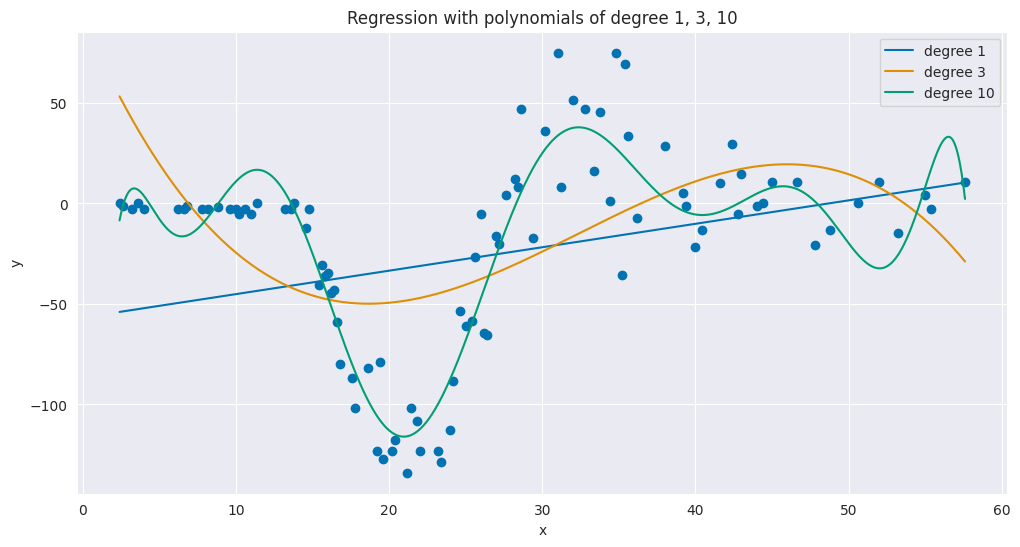

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


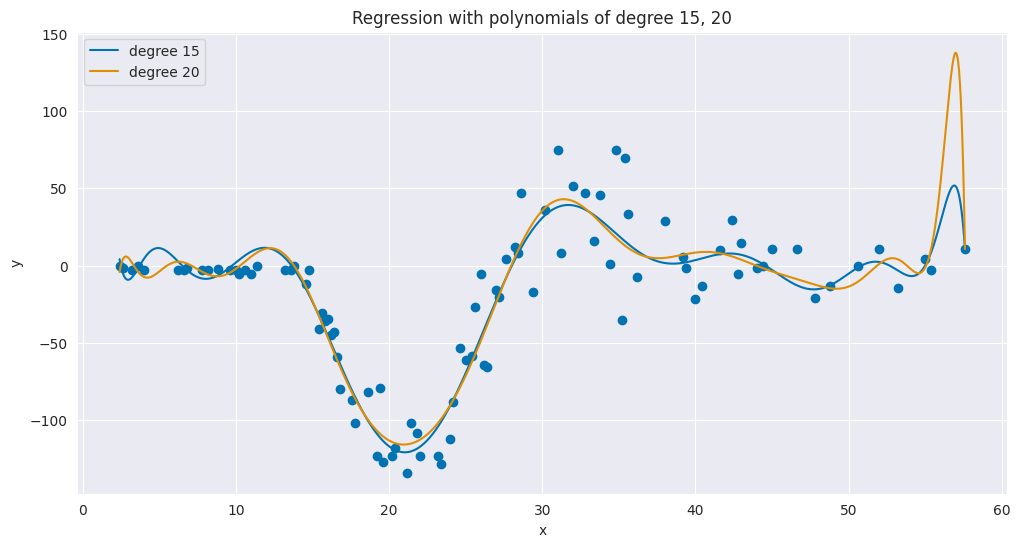

In [9]:
X = weights_df['x']
y = weights_df['y_mean']
W = weights_df['y_count']

#get coefficients of the 3 polynomials and plot the fitted curves on the same plot with the data
coefs_1 = np.polyfit(X, y, 1, w=W)
coefs_3 = np.polyfit(X, y, 3, w=W)
coefs_10 = np.polyfit(X, y, 10, w=W)

#get points for the fitted curves
x = np.linspace(X.min(), X.max(), 1000)
y_1 = np.polyval(coefs_1, x)
y_3 = np.polyval(coefs_3, x)
y_10 = np.polyval(coefs_10, x)

#subplot with 3 plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(x, y_1, label="degree 1", color='black')
axs[0].scatter(X, y, marker="o")
axs[0].title.set_text("Regression with polynomials of degree 1")
axs[0].yaxis.set_label_text("y")
axs[0].xaxis.set_label_text("x")
axs[0].legend()

axs[1].plot(x, y_3, label="degree 3", color='black')
axs[1].scatter(X, y, marker="o")
axs[1].title.set_text("Regression with polynomials of degree 3")
axs[1].yaxis.set_label_text("y")
axs[1].xaxis.set_label_text("x")
axs[1].legend()

axs[2].plot(x, y_10, label="degree 10", color='black')
axs[2].scatter(X, y, marker="o")
axs[2].title.set_text("Regression with polynomials of degree 10")
axs[2].yaxis.set_label_text("y")
axs[2].xaxis.set_label_text("x")
axs[2].legend()

#plot the 3 functions
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, marker="o")
ax.plot(x, y_1, label="degree 1")
ax.plot(x, y_3, label="degree 3")
ax.plot(x, y_10, label="degree 10")
ax.title.set_text("Regression with polynomials of degree 1, 3, 10")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()
plt.show()

#Higher polynomials
coefs_15 = np.polyfit(X, y, 15, w=W)
coefs_20 = np.polyfit(X, y, 20, w=W)

y_15 = np.polyval(coefs_15, x)
y_20 = np.polyval(coefs_20, x)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, marker="o")
ax.plot(x, y_15, label="degree 15")
ax.plot(x, y_20, label="degree 20")
ax.title.set_text("Regression with polynomials of degree 15, 20")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()




/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


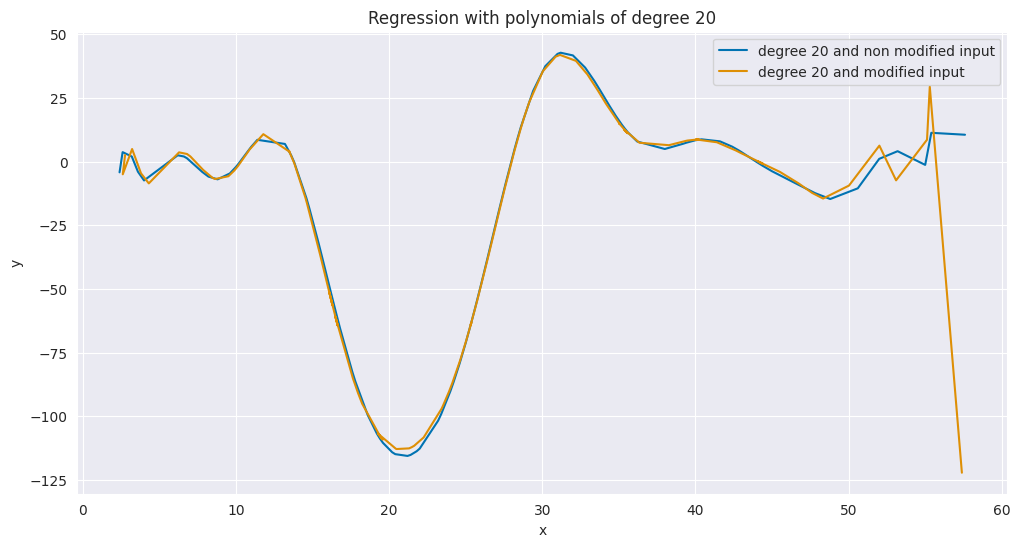

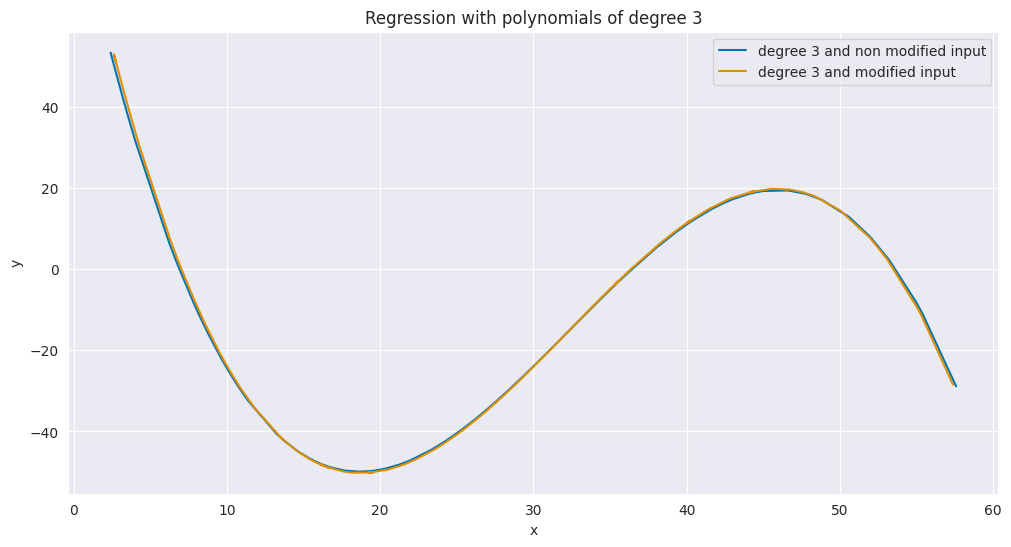

In [10]:
X = weights_df['x']
longer_X = weights_df['x'] * 5
y = weights_df['y_mean']
W = weights_df['y_count']
noise = np.random.normal(0,0.2,len(X))
#Higher polynomials
coefs_20 = np.polyfit(X, y, 20, w=W)
coefs_20_modified = np.polyfit(X + noise, y, 20, w=W)

# Putting a different input
y_20 = np.polyval(coefs_20, X)

# Extrapolating a bit by multiplying the input by a small scalar
y_20_input_modified = np.polyval(coefs_20_modified, X * 1.002 + noise)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X, y_20, label="degree 20 and non modified input")
ax.plot(X + noise, y_20_input_modified, label="degree 20 and modified input")
ax.title.set_text("Regression with polynomials of degree 20")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()


# For a lower degree we don't have the same problems of instability and unreliable extrapolation
X = weights_df['x']
y = weights_df['y_mean']
W = weights_df['y_count']
#Higher polynomials
coefs_3 = np.polyfit(X, y, 3, w=W)
coefs_3_modified = np.polyfit(X + noise, y, 3, w=W)

# Putting a different input
y_3 = np.polyval(coefs_3, X)

# Extrapolating a bit by multiplying the input by a small scalar
y_3_input_modified = np.polyval(coefs_3_modified, X * 1.002 + noise)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(X, y_3, label="degree 3 and non modified input")
ax.plot(X + noise, y_3_input_modified, label="degree 3 and modified input")
ax.title.set_text("Regression with polynomials of degree 3")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()

In the cell above, we compared the resulting polynomials of degree 3 and 20 with original data and with a small noise added. It is possible to observe that the polynomial with degree 3 is more stable, while the other one changes too much its shape and prediction when we add a noise.

## Cubic spline regression
#### Question 3
Complete the function `solve_splines_naive` that computes $g$ and $\gamma$ given the data. 

#### Question 4 
Knowing that $R + \alpha Q^\top Q$ is invertible, write an implementation of `solve_splines` that performs 0 matrix inversions.

In [11]:
def _construct_R_Q(x):
    """Function that constructs the matrices R and Q given the knots x_i."""
    n = len(x)
    h = np.diff(x)
    R = np.zeros((n-2, n-2))
    Q = np.zeros((n, n))
    
    # construct R
    indx = np.arange(n)
    # diag elements
    R[indx[:-2], indx[:-2]] = (h[1:] + h[:-1]) / 3
    # upper + lower diag elements
    R[indx[:-3], indx[1:-2]] = R[indx[1:-2], indx[:-3]] = h[1:-1] / 6
    
    # construct Q with the weird column indexing in mind in (n x n) matrix before filtering at the end
    Q[indx[1:-1], indx[1:-1]] = - 1 / h[1:] - 1 / h[:-1]
    Q[indx[2:], indx[1:-1]] = 1 / h[:-1]
    Q[indx[:-2], indx[1:-1]] = 1 / h[1:]
    
    # keep the n x n-2 matrix 
    Q = Q[:, 1:-1]
    return R, Q

def solve_splines_naive(x, y, weights, alpha=0.1):
    """Function that solves the problem and returns g and gamma."""
    W = np.diag(weights)
    R, Q = _construct_R_Q(x)
    K = Q @ np.linalg.inv(R) @ Q.T
    A_inv = W + alpha* K
    g = np.linalg.inv(A_inv) @ y
    gamma = np.linalg.inv(R) @ Q.T @ g
    return g, gamma

def solve_splines(x, y, weights, alpha=0.1):
    """Function that solves the problem and returns g and gamma."""
    weights = 1/weights # since weights is a positive vector we can just divide the vector by one 
    # and its diagonal matrix will be inversed
    W = np.diag(weights)
    R, Q = _construct_R_Q(x)
    
    A = R + alpha * Q.T @ Q # Giving a random name of A to this matrix
    
    gamma = np.linalg.solve(A, Q.T @ y) 
    g = y - alpha * (Q @ gamma)
    
    return g, gamma

Testing the functions completed for different values of $\alpha$

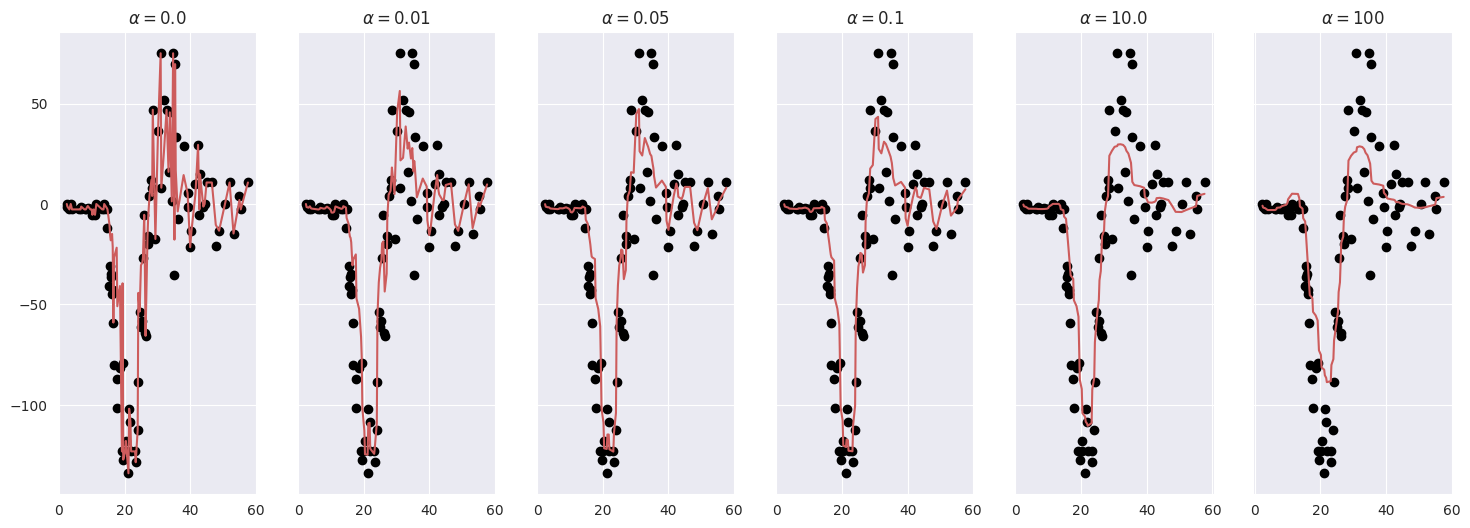

In [15]:
#Using solve_splines_NAIVE
alphas = [0., 0.01, 0.05, 0.1, 10., 100]
f, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)
x = weights_df["x"].values
y = weights_df["y_mean"].values
weights = weights_df['y_count'].values
for ax, alpha in zip(axes, alphas):
    #g, gamma = solve_splines(x, y, weights, alpha=alpha)
    g, gamma = solve_splines_naive(x, y, weights, alpha=alpha)
    ax.scatter(x, y, color="k")
    ax.plot(x, g, color="indianred")
    ax.set_title(rf"$\alpha = {alpha}$")
plt.show()

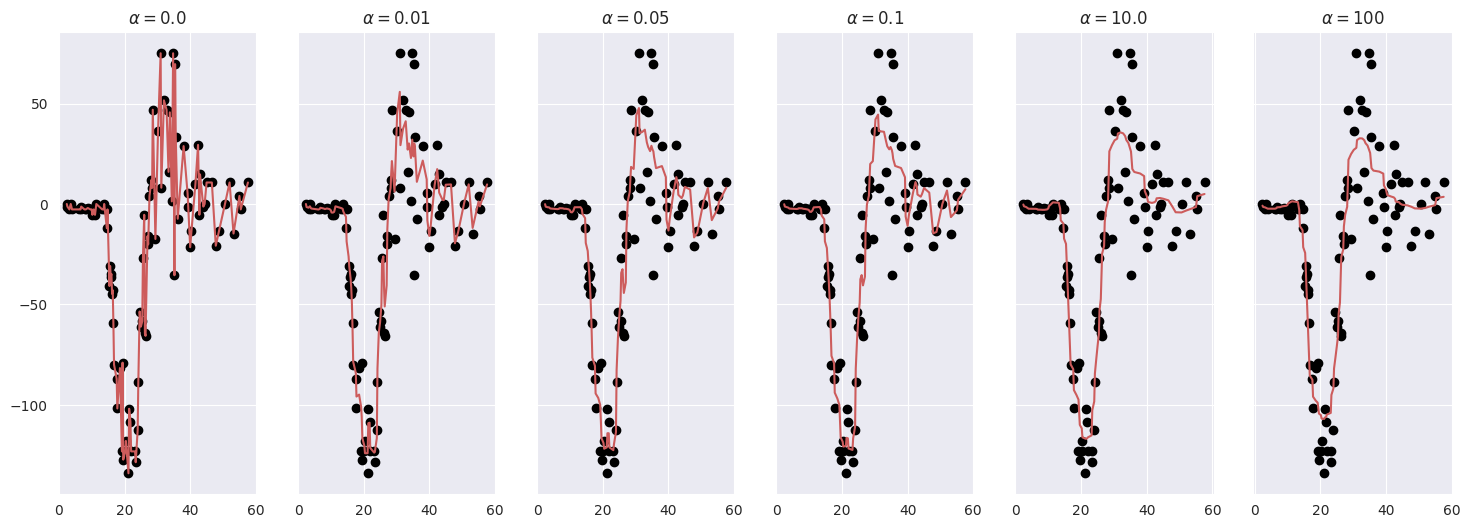

In [14]:
#Using solving_splines
alphas = [0., 0.01, 0.05, 0.1, 10., 100]
f, axes = plt.subplots(1, 6, figsize=(18, 6), sharey=True)
x = weights_df["x"].values
y = weights_df["y_mean"].values
weights = weights_df['y_count'].values
for ax, alpha in zip(axes, alphas):
    g, gamma = solve_splines(x, y, weights, alpha=alpha)
    #g, gamma = solve_splines_naive(x, y, weights, alpha=alpha)
    ax.scatter(x, y, color="k")
    ax.plot(x, g, color="indianred")
    ax.set_title(rf"$\alpha = {alpha}$")
plt.show()

#### Question 5
Implement a GCV function that returns the GCV score. Visualize the GCV score as a function of alpha.

In [16]:
from sklearn.model_selection import train_test_split

def gcv(x, y, weights, alphas):
    """Compute GCV score for a grid of alphas"""
    R, Q = _construct_R_Q(x)
    W_diag = np.diag(weights)
    n = len(x)
    gcv_alpha = []
    for alpha in alphas:
        K = Q @ np.linalg.inv(R) @ Q.T
        A = np.linalg.inv(W_diag + alpha* K)
        trace_A = np.trace(A)
        g = np.linalg.inv(np.linalg.inv(A)) @ y
        gamma = np.linalg.inv(R) @ Q.T @ g

        predicitions = A @ y
        
        residuals = y - predicitions
        len(residuals)
        rss = np.sum(residuals ** 2)
        gcv_score = rss / ((1 - trace_A / n) ** 2)
        gcv_score /= n
        gcv_alpha.append(gcv_score)
    return gcv_alpha

Best alpha =  21.361559899741668
Minimum score = 675.1120198483084


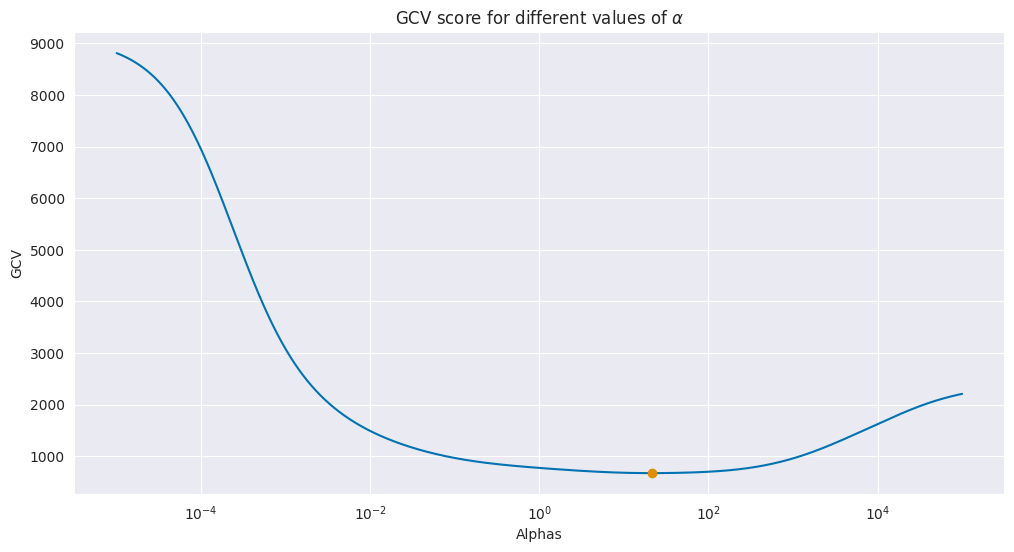

In [27]:
#Define a range of alpha values
alphas = np.logspace(-5, 5, 10000)  

x = weights_df["x"].values
y = weights_df["y_mean"].values
weights = weights_df['y_count'].values

#Call gcv function to obtain the scores
gcv_alphas = gcv(x, y, weights, alphas)

#Get the smallest value (best alpha)
min_gcv_index = np.argmin(gcv_alphas)
best_alpha = alphas[min_gcv_index]

print('Best alpha = ', best_alpha)
print('Minimum score =', min(gcv_alphas))

#Plotting results
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(alphas, gcv_alphas)
ax.set_xlabel('Alphas')
ax.set_ylabel('GCV')
ax.set_xscale('log')
ax.plot(best_alpha, min(gcv_alphas), 'o')
ax.set_title(rf'GCV score for different values of $\alpha$')
plt.show()

### Custom regressor and cross validation with scikit-learn
To evaluate the best polynomial fit using cross-validation, we write our own scikit-learn and use scikit-learn's GridSearchCV to perform cross-validation. 

#### Question 6
Fill the class below and find the best Polynomial fit:


In [34]:
# For a lower degree we don't have the same problems of instability and unreliable extrapolation
x = weights_df['x']
y = weights_df['y_mean']
w = weights_df['y_count']

In [35]:
from sklearn.base import RegressorMixin, BaseEstimator
from sklearn.model_selection import GridSearchCV, LeaveOneOut

class PolynomialFit(BaseEstimator, RegressorMixin):
    def __init__(self, degree=5):
        self.degree = degree
        
    def fit(self, x, y, weights=None):
        
        # todo 
        coefs = np.polyfit(x, y, self.degree, w=weights) 
        self.coefs_ = coefs
        return self

    def predict(self, x):
        # todo
        y = np.polyval(self.coefs_, x)
        return y

params = {"degree": np.arange(16)}
cv = LeaveOneOut()
poly_cv = GridSearchCV(PolynomialFit(), params, cv=cv, scoring="neg_mean_squared_error")
poly_cv.fit(x, y)
poly_cv.best_estimator_

PolynomialFit(degree=8)

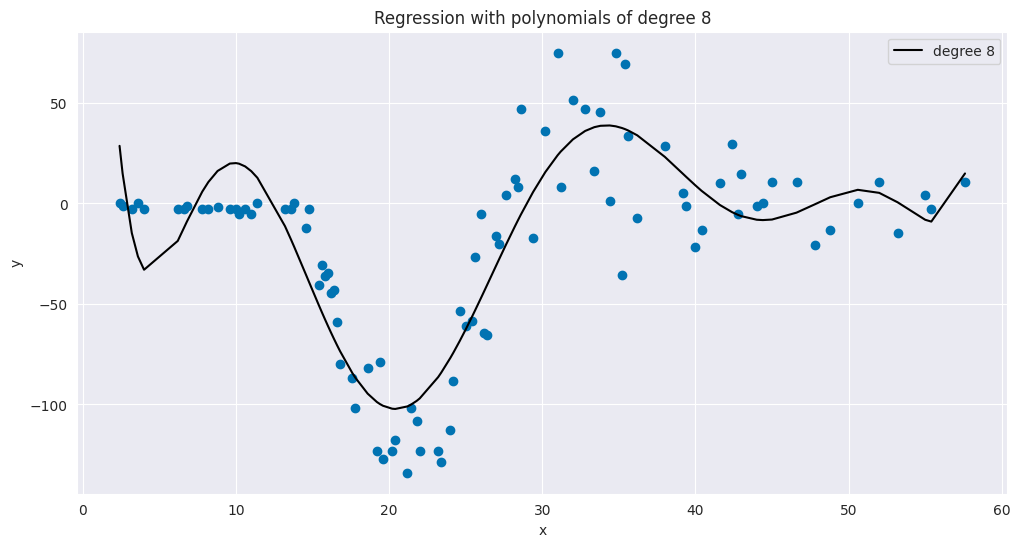

In [36]:
degree = poly_cv.best_estimator_.degree
best_poly = PolynomialFit(degree)
best_poly.fit(x, y)
y_predict = best_poly.predict(x)
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, marker="o")
ax.plot(x, y_predict, label=f"degree {degree}", color='black')
ax.title.set_text(f"Regression with polynomials of degree {degree}")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()

#### Question 7
See the content of `poly_cv.cv_results_` and plot the mean CV score as a function of the degree. 

In [37]:
print(poly_cv.cv_results_)

{'mean_fit_time': array([0.00042847, 0.00052119, 0.0005177 , 0.00066346, 0.00067793,
       0.00056778, 0.00045744, 0.00049909, 0.00046469, 0.00046245,
       0.0005696 , 0.00051181, 0.0004968 , 0.00051641, 0.00050246,
       0.00051815]), 'std_fit_time': array([2.20228541e-04, 3.83862938e-04, 1.17574204e-04, 7.86277714e-05,
       8.66072394e-05, 2.11186426e-04, 4.80716602e-05, 8.33203031e-05,
       3.50482525e-05, 1.74351240e-05, 2.44473812e-04, 1.70757915e-04,
       6.21983086e-05, 7.41543964e-05, 3.17545628e-05, 6.42432286e-05]), 'mean_score_time': array([0.00038356, 0.0004225 , 0.00047499, 0.00057101, 0.00057693,
       0.00044802, 0.00038088, 0.00042652, 0.00038465, 0.00038247,
       0.00047026, 0.00040862, 0.00039353, 0.00043102, 0.00040307,
       0.00040689]), 'std_score_time': array([9.50996063e-05, 1.19560584e-04, 2.25983887e-04, 9.50535787e-05,
       1.20233248e-04, 9.59218487e-05, 2.83799446e-05, 1.07518202e-04,
       2.91779302e-05, 1.98723048e-05, 1.65792873e-04, 5.

In [38]:
print(poly_cv.cv_results_.keys())
mean_test_score = poly_cv.cv_results_['mean_test_score']
indexes_order = np.argsort(mean_test_score)[::-1]
mean_test_score = np.take_along_axis(poly_cv.cv_results_['mean_test_score'], indexes_order, axis=0)
degrees = np.take_along_axis(poly_cv.cv_results_['param_degree'], indexes_order, axis=0)
print(mean_test_score)
print(degrees)

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split10_test_score', 'split11_test_score', 'split12_test_score', 'split13_test_score', 'split14_test_score', 'split15_test_score', 'split16_test_score', 'split17_test_score', 'split18_test_score', 'split19_test_score', 'split20_test_score', 'split21_test_score', 'split22_test_score', 'split23_test_score', 'split24_test_score', 'split25_test_score', 'split26_test_score', 'split27_test_score', 'split28_test_score', 'split29_test_score', 'split30_test_score', 'split31_test_score', 'split32_test_score', 'split33_test_score', 'split34_test_score', 'split35_test_score', 'split36_test_score', 'split37_test_score', 'split38_test_score', 'split39_test_score', 'split40_test_score', '

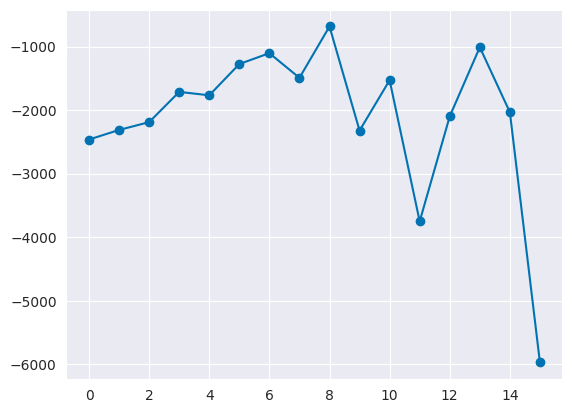

In [60]:
plt.scatter(degrees, mean_test_score)
plt.plot(np.sort(degrees.data),[x for _,x in sorted(zip(degrees.data, mean_test_score))])
plt.show()


#### Question 8
Visualize the obtained best polynomial fit as well as the best cubic spline given by the GCV score minimizer.

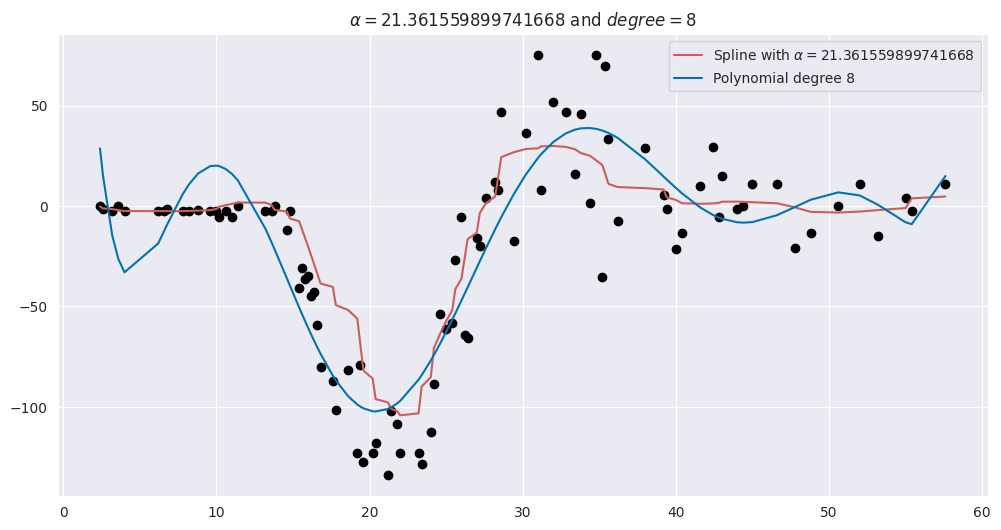

In [47]:
degree = poly_cv.best_estimator_.degree
best_poly = PolynomialFit(degree)
best_poly.fit(x, y)
y_predict = best_poly.predict(x)

fig, ax = plt.subplots(figsize=(12, 6))
alpha=best_alpha
g, gamma = solve_splines_naive(x, y, weights, alpha=alpha)
ax.scatter(x, y, color="k")
ax.plot(x, g, color="indianred", label=rf"Spline with $\alpha = {alpha}$")
ax.plot(x, y_predict, label=f"Polynomial degree {degree}")
ax.set_title(rf"$\alpha = {alpha}$ and $degree = {degree}$")
ax.legend()

#### Question 9
Scikit-learn pipelines can be used to serialize several operations or models in one estimator. For ex:
```from sklearn.pipeline import Pipeline
pip = Pipeline([("Model_1_Name", Model1), ("Model_2_Name", Model2)])
pip.fit(X, y) ....
```
Using scikit-learn's `PolynomialFeatures` transformator, write a model that performs a polynomial.

<ipython-input-62-6ef0f84a70e7>:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_p = x[:, np.newaxis]
<ipython-input-62-6ef0f84a70e7>:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_p = y[:, np.newaxis]


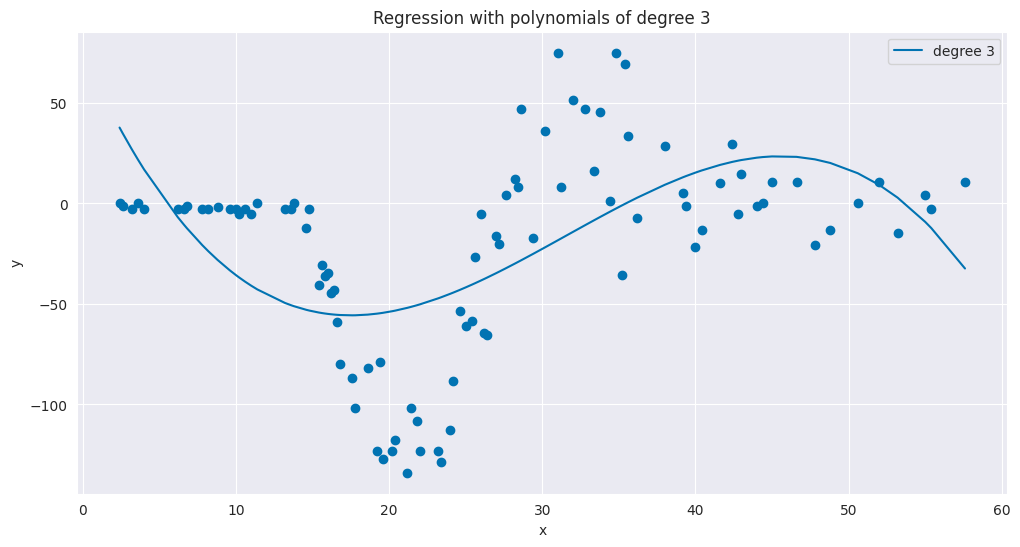

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a pipeline that first applies PolynomialFeatures and then fits a LinearRegression model
degree = 3
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=degree)),
    ("linear_regression", LinearRegression())
])

x_p = x[:, np.newaxis]
y_p = y[:, np.newaxis]
# Fit the pipeline to the data
poly_reg.fit(x_p, y_p)

# Use the pipeline to make predictions
y_pred =  poly_reg.predict(x.values.reshape(-1, 1))

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(X, y, marker="o")
ax.plot(X, y_pred, label=f"degree {degree}")
ax.title.set_text(f"Regression with polynomials of degree {degree}")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()



#### Question 10
Perform cross validation on the degree of this model using scikit-learn.

In [63]:
params = {"poly_features__degree": np.arange(16)} 
cv = LeaveOneOut()
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("linear_regression", LinearRegression())
])
poly_cv = GridSearchCV(poly_reg, params, cv=cv, scoring="neg_mean_squared_error")
poly_cv.fit(x_p, y_p)
print(poly_cv.best_estimator_)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=8)),
                ('linear_regression', LinearRegression())])


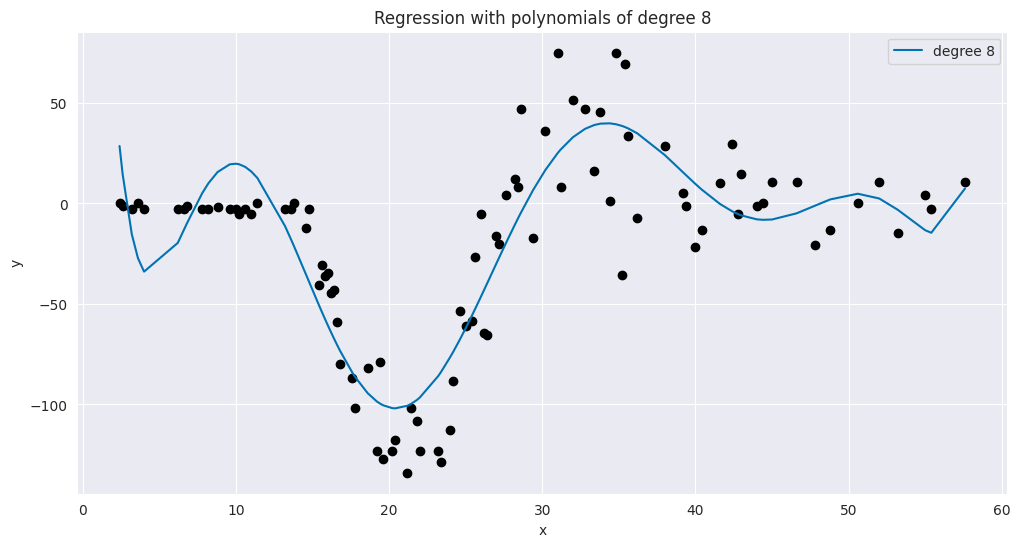

In [ ]:
#plot the results
degree = poly_cv.best_estimator_.named_steps['poly_features'].degree
best_poly = poly_reg.set_params(poly_features__degree=degree)
best_poly.fit(x_p, y_p)
y_predict = best_poly.predict(x_p)

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, marker="o", color='black')
ax.plot(x, y_predict, label=f"degree {degree}")
ax.title.set_text(f"Regression with polynomials of degree {degree}")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()



#### Question 11
Find the analytical expression of the NCS given $g$ and $\gamma$ to evaluate it on any data point $x$. Visualize it on a grid of a few hundred regular points.

Given an interval $[t_{l}, t_{r}]$ we have that the value of the function in a $t$ in this interval can be calculated as:
$\begin{aligned} g(t)= & \frac{\left(t-t_L\right) g_R+\left(t_R-t\right) g_L}{h} -\frac{1}{6}\left(t-t_L\right)\left(t_R-t\right)\left\{\left(1+\frac{t-t_L}{h}\right) \gamma_R+\left(1+\frac{t_R-t}{h}\right) \gamma_L\right\}\end{aligned}$
In order to evaluate it on any datapoint t we need to perform these calculations for each interval x on our dataset calculating all the $g(t)$ of the grid on each interval. 

In [ ]:
def evaluate(g_, gamma_, x_, y_, number_of_points):
  # Initialize an empty list to store the intervals
  intervals_points = []
  intervals_index = []
  grid = np.linspace(x_.min(), x_.max(), number_of_points)

  # Loop over the array and extract each interval
  g_t =[]
  x_axis = np.array([])
  for i in range(len(gamma_)-1):
      x_l = x[i]     # start point of the interval
      x_r = x[i+1]   # end point of the interval
      intervals_points.append((x_l, x_r))   # add the interval to the list
      intervals_index.append((i, i + 1)) # appending also the indexesof the intervals
      interval = intervals_points[i]
      index = intervals_index[i]
      t_l = interval[0]
      t_r = interval[1]
      g_l = g_[index[0]]
      g_r = g_[index[1]]
      gamma_l = gamma_[index[0]]
      gamma_r = gamma_[index[1]]
      h = t_r - t_l
      gridpoints = grid[grid >= t_l]
      gridpoints = gridpoints[gridpoints <= t_r]
      gridpoints = np.array(gridpoints)
      try:
        x_axis = np.concatenate([x_axis, gridpoints]) # append the value of each point of gridpoints to the x_axis
      except:
        pass
      for t in gridpoints:
        g_t.append(((t - t_l)*g_r + (t_r - t)*g_l)/h - (1/6)*(t - t_l)*(t_r - t)*((1 + (t - t_l)/h)*gamma_r + (1 + (t_r - t)/h)*gamma_l))
  return (x_axis, g_t)

In [ ]:
number_of_points = 1000
x_axis, y_axis = evaluate(g, gamma, x, y, number_of_points)

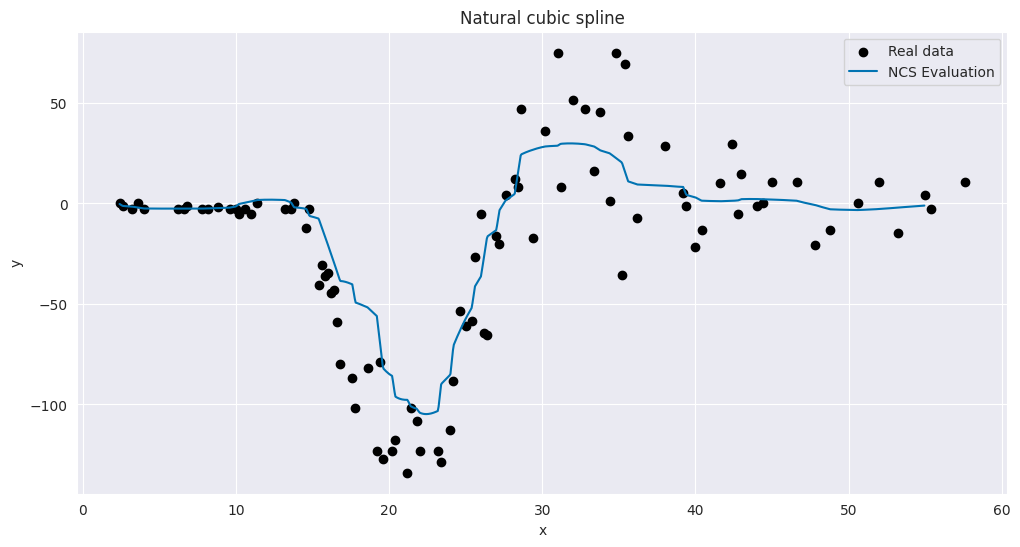

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y, marker="o", color='black', label="Real data")
ax.plot(x_axis, y_axis, label=f"NCS Evaluation")
ax.title.set_text(f"Natural cubic spline")
ax.yaxis.set_label_text("y")
ax.xaxis.set_label_text("x")
ax.legend()